# MATH 3375 Examples Notebook #19

# Bootstrap Samples and Ensemble Methods: Bagging and Random Forests

**_Ensemble methods_** take the average prediction of multiple models:
* For continuous (quantitative) response variable: mean or weighted mean of predicted value from all models
* For classification: majority "vote" of the the predicted class from all models

This has the effect of:
* Reducing variance
* Reducing the effect of any one model being overfit 
* Improving prediction overall

We will illustrate with the **iris** data set.


In [9]:
#Look at data set
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

## Generating More Samples for Training: Bootstrap Samples

To create multiple models, we need more than one training data set. Rather than subdivide the one data set we have into smaller samples, we can leverage the power of **bootstrapping** to create many samples that are just as large as our full original data set. Each 'bootstrap sample' is created by sampling _**with replacement**_ from the original data set. It represents what _another_ sample from the same population **_could_** look like.

An example is given below. The iris data set has 150 records.  We create a list of row numbers (**idx**) to create another set of 150, but it is not identical to the original, because some rows may be chosen multiple times, while others may not be chosen at all. The ability to choose rows more than once is the result of sampling with replacement. 

### Sample Row Numbers with Replacement

The first step is to sample the possible row numbers with replacement to identify which rows will be included in the bootstrap sample. (Note that the row numbers are NOT selected in order, but they are displayed in order to make it easier to see which row numbers were included multiple times, and which were not included at all.)

In [3]:
#Choose rows for bootstrap sample
set.seed(3375)
idx <- sample(1:nrow(iris),nrow(iris),replace=TRUE)
sort(idx)

[1]   1   1   2   5   5   6   7   7   7   7   8   9  10  10  10  11  12  13
 [19]  13  14  14  15  15  16  18  21  21  24  24  28  28  28  29  29  29  30
 [37]  31  31  32  35  36  37  38  39  41  42  42  45  45  45  46  49  50  52
 [55]  55  55  57  59  61  61  61  62  64  65  67  68  69  70  70  71  71  72
 [73]  73  73  75  76  76  79  80  81  81  82  85  88  88  89  90  90  92  92
 [91]  96 100 100 100 101 102 102 103 106 110 112 112 113 113 113 115 116 117
[109] 117 118 119 120 121 123 124 125 125 125 126 127 127 128 130 130 131 131
[127] 131 132 132 132 133 134 134 135 136 137 140 140 141 141 145 147 148 148
[145] 148 149 149 149 150 150

### Use Row Numbers to Create Sample

In [4]:
boot1 <- iris[idx,]
head(boot1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,4.6,3.4,1.4,0.3,setosa
149,6.2,3.4,5.4,2.3,virginica
92,6.1,3.0,4.6,1.4,versicolor
8,5.0,3.4,1.5,0.2,setosa
37,5.5,3.5,1.3,0.2,setosa
73,6.3,2.5,4.9,1.5,versicolor


### Compare Bootstrap Sample to Original Data Set 

The comparison below further illustrates that the bootstrap sample is the same size as our original data set, but has slightly different composition.

In [5]:
#Size of data sets
nrow(iris)
nrow(boot1)
head(boot1)
summary(boot1)

[1] 150

[1] 150

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,4.6,3.4,1.4,0.3,setosa
149,6.2,3.4,5.4,2.3,virginica
92,6.1,3.0,4.6,1.4,versicolor
8,5.0,3.4,1.5,0.2,setosa
37,5.5,3.5,1.3,0.2,setosa
73,6.3,2.5,4.9,1.5,versicolor


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width        Species  
 Min.   :4.300   Min.   :2.000   Min.   :1.100   Min.   :0.1   setosa    :53  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.3   versicolor:41  
 Median :5.800   Median :3.000   Median :4.400   Median :1.3   virginica :56  
 Mean   :5.881   Mean   :3.066   Mean   :3.767   Mean   :1.2                  
 3rd Qu.:6.475   3rd Qu.:3.400   3rd Qu.:5.300   3rd Qu.:1.9                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.5                  

In [7]:
#Summary of data set variables
summary(iris$Species)
summary(boot1$Species)

setosa versicolor  virginica 
        50         50         50

setosa versicolor  virginica 
        53         41         56

In [8]:
summary(iris$Petal.Length)
summary(boot1$Petal.Length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.600   4.350   3.758   5.100   6.900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.100   1.500   4.400   3.767   5.300   6.900 

## Bagging

Bagging (**B**ootstrap **agg**regat**ing**) is a process in which several bootstrap samples are created, and a model (such as a tree) is created for each sample. Then the average prediction from all models combined is used for each data point.

## Random Forest

A random forest uses the principle of bagging with decision trees, but also _**randomly selects which features to use as predictors**_ for each tree. Thus, each tree has both a different training set and a different feature set of predictors.

We will implement random forests with the **randomForest** package.

In [9]:
#install.packages("randomForest")
library(randomForest)

Warning message:
“package ‘randomForest’ is not available for this version of R
‘randomForest’ version 4.7-1.1 is in the repositories but depends on R (>= 4.1.0)

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [11]:
#Create test and train set

test_rows <- c(14,23,80,119,123)
iris_test <- iris[test_rows,]
iris_train <- iris[-test_rows,]

In [12]:
#Create model to predict species
iris_model_forest_01 <- randomForest(Species~.,data=iris_train)

,MeanDecreaseGini
Sepal.Length,9.476138
Sepal.Width,2.389115
Petal.Length,40.196382
Petal.Width,43.865965


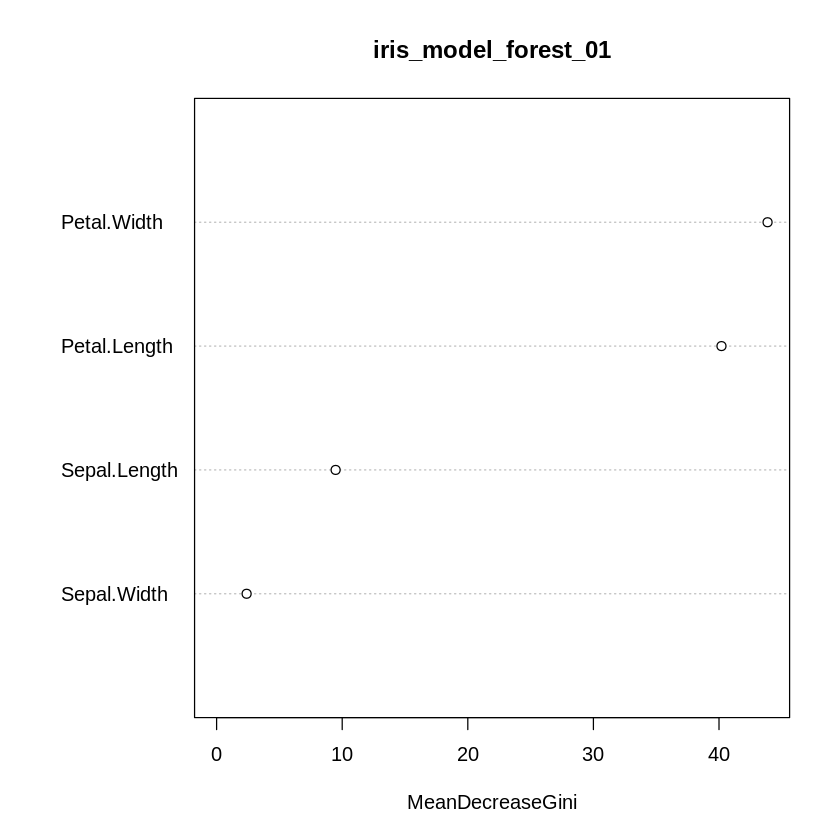

In [19]:
#Display some information available from model 
#Variable Importance (Average across all trees) 

importance(iris_model_forest_01)
varImpPlot(iris_model_forest_01)

,IncNodePurity
Sepal.Length,100.09003
Sepal.Width,41.18398
Petal.Width,139.72677
Species,137.49434


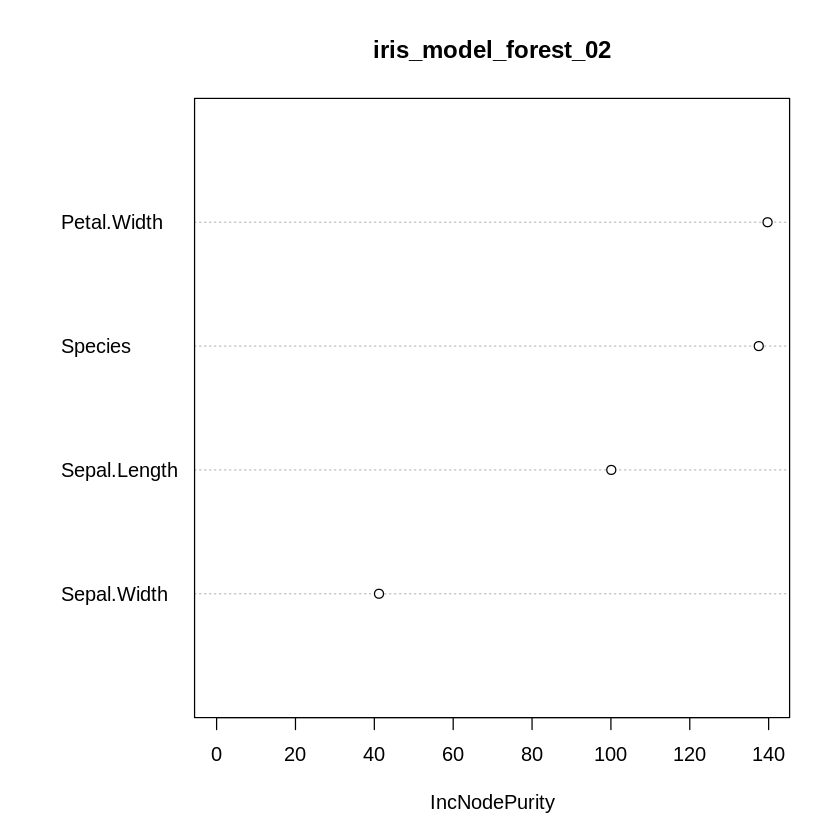

In [18]:
#Create model
iris_model_forest_02 <- randomForest(Petal.Length~.,data=iris_train)

#Variable importance (continuous response variable)

importance(iris_model_forest_02)
varImpPlot(iris_model_forest_02)

## Using the Random Forest Models for Prediction

Using the test set that we set aside, we will see how each random forest can be used for prediction.  

In [20]:
iris_test


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
14,4.3,3.0,1.1,0.1,setosa
23,4.6,3.6,1.0,0.2,setosa
80,5.7,2.6,3.5,1.0,versicolor
119,7.7,2.6,6.9,2.3,virginica
123,7.7,2.8,6.7,2.0,virginica


In [22]:
test_pred_species <- predict(iris_model_forest_01,iris_test)
test_pred_species

14         23         80        119        123 
    setosa     setosa versicolor  virginica  virginica 
Levels: setosa versicolor virginica

In [23]:
test_pred_length <- predict(iris_model_forest_02,iris_test)
test_pred_length

14       23       80      119      123 
1.418601 1.475767 4.083548 5.756361 5.814590

### Comparing Predictions with Actual Values

In [24]:
data.frame(Actual=iris_test$Species,Predicted=test_pred_species)
data.frame(Actual=iris_test$Petal.Length,Predicted=test_pred_length)

,Actual,Predicted
,<fct>,<fct>
14,setosa,setosa
23,setosa,setosa
80,versicolor,versicolor
119,virginica,virginica
123,virginica,virginica


,Actual,Predicted
,<dbl>,<dbl>
14,1.1,1.418601
23,1.0,1.475767
80,3.5,4.083548
119,6.9,5.756361
123,6.7,5.814590


## Parameters for Fine Tuning Random Forests

Just as decision trees can be fine tuned (e.g., pruned to desired level), so can random forests. Some of the most important tuning parameters are:

* ntree = number of tress to grow, and the default is 500. 
* mtry = number of variables randomly sampled as candidates at each split. 
  The default is sqrt(p) for classfication and p/3 for regression
* nodesize = minimum size of terminal nodes. 
  The default value is 1 for classification and 5 for regression
  
Ideally, you can try several different values of each parameter to see what yields the best results.

The documentation for randomForest gives more detail on the options (parameters) and on what is stored in the model that is returned.

In [25]:
?randomForest